5


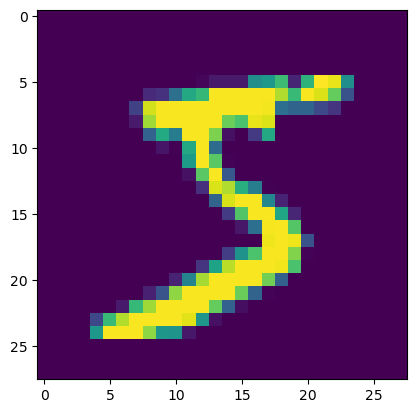

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize to [0, 1]

index =0
plt.imshow(x_train[0])
print(y_train[index])


In [2]:
x_train = x_train.reshape(-1, 28 * 28)  # Flatten images
x_test = x_test.reshape(-1, 28 * 28)

# Convert labels to one-hot encoding
y_train_onehot = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test_onehot = tf.keras.utils.to_categorical(y_test, num_classes=10)

print(y_train_onehot[index])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [3]:
x_train.shape

(60000, 784)

In [10]:
class SimpleNN(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.flatten = tf.keras.layers.Flatten()
        self.d1 = tf.keras.layers.Dense(128,activation='relu',input_shape =(784,))
        self.d2 = tf.keras.layers.Dense(10,activation="softmax")

    def call(self,x):
        x=self.flatten(x)
        x = self.d1(x)
        return self.d2(x)

In [5]:
model = SimpleNN()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
loss_fn = tf.keras.losses.CategoricalCrossentropy()
model.build(input_shape=(None, 784))
model.compile(loss=loss_fn,
              optimizer = optimizer,
              metrics = ['accuracy'])

model.summary()


Model: "simple_nn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               multiple                  100480    
                                                                 
 dense_1 (Dense)             multiple                  1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.predict(x_test)

313/313 [==============================] - 4s 3ms/step


array([[0.07738132, 0.09692255, 0.11516624, ..., 0.1154205 , 0.06485283,
        0.09201965],
       [0.04631735, 0.08118603, 0.09869036, ..., 0.11594068, 0.15084794,
        0.1076143 ],
       [0.06845242, 0.08485422, 0.11741155, ..., 0.10246221, 0.13483573,
        0.11375238],
       ...,
       [0.05391633, 0.10345846, 0.09073649, ..., 0.10930739, 0.1436524 ,
        0.11861084],
       [0.03643187, 0.08268881, 0.10714992, ..., 0.10198992, 0.12290382,
        0.19157721],
       [0.03585284, 0.08986481, 0.10418092, ..., 0.05792069, 0.20329668,
        0.08886363]], dtype=float32)

In [7]:
epochs =3
batch_size = 32
step_per_epoch = len(x_train)//batch_size
step_per_epoch

1875

In [8]:
model.trainable_variables

[<tf.Variable 'dense/kernel:0' shape=(784, 128) dtype=float32, numpy=
 array([[-0.06051702, -0.03530392,  0.01647215, ...,  0.01651328,
          0.04383297,  0.03099284],
        [-0.08098439,  0.07963922,  0.01721469, ...,  0.07225131,
         -0.02122924, -0.02806755],
        [ 0.05351258, -0.01510828,  0.02773089, ...,  0.0244948 ,
         -0.04075489, -0.06076322],
        ...,
        [-0.06276499, -0.03306103, -0.04761867, ...,  0.05501612,
          0.03466655,  0.00785106],
        [ 0.05325333, -0.06530016, -0.06814639, ...,  0.01842924,
         -0.04522474,  0.00510475],
        [ 0.08091704, -0.02044211, -0.07584224, ..., -0.00351907,
          0.030842  , -0.05958672]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(128,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [11]:
history = model.fit(
    x=x_train,
    y= y_train_onehot,
    validation_data = (x_test,y_test_onehot),
    batch_size = 16,
    epochs = 10,
    verbose =1
)

Epoch 1/10
3750/3750 [==============================] - 8s 2ms/step - loss: 0.0131 - accuracy: 0.9956 - val_loss: 0.0838 - val_accuracy: 0.9803
Epoch 2/10
3750/3750 [==============================] - 16s 4ms/step - loss: 0.0135 - accuracy: 0.9955 - val_loss: 0.1059 - val_accuracy: 0.9776
Epoch 3/10
3750/3750 [==============================] - 37s 10ms/step - loss: 0.0104 - accuracy: 0.9966 - val_loss: 0.0978 - val_accuracy: 0.9777
Epoch 4/10
3750/3750 [==============================] - 15s 4ms/step - loss: 0.0102 - accuracy: 0.9965 - val_loss: 0.1153 - val_accuracy: 0.9772
Epoch 5/10
3750/3750 [==============================] - 32s 9ms/step - loss: 0.0089 - accuracy: 0.9969 - val_loss: 0.1171 - val_accuracy: 0.9763
Epoch 6/10
3750/3750 [==============================] - 38s 10ms/step - loss: 0.0084 - accuracy: 0.9972 - val_loss: 0.1052 - val_accuracy: 0.9791
Epoch 7/10
3750/3750 [==============================] - 42s 11ms/step - loss: 0.0081 - accuracy: 0.9973 - val_loss: 0.1151 - val_

In [12]:
# Evaluate the model
test_loss = loss_fn(y_test_onehot, model(x_test))
test_accuracy = tf.keras.metrics.categorical_accuracy(y_test_onehot, model(x_test))
print(f"Test Loss: {test_loss.numpy():.4f}, Test Accuracy: {tf.reduce_mean(test_accuracy).numpy():.4f}")

Test Loss: 0.1108, Test Accuracy: 0.9806
